In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture_model.json', 'w').write(model_json)
#save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Using TensorFlow backend.


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_______________________________________________

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

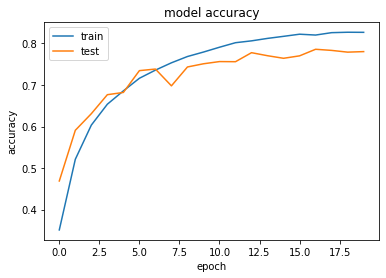

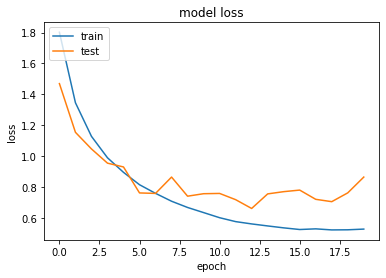

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture_model.json', 'w').write(model_json)
#save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

X_train shape:  (50000, 32, 32, 3)
50000  train samples
10000  test samples


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

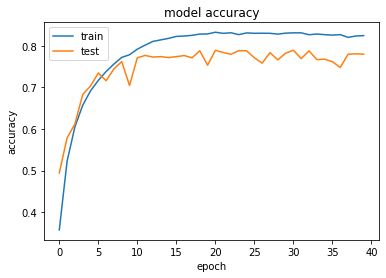

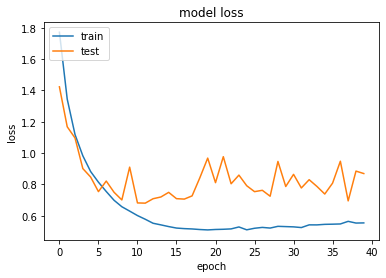

In [5]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constants
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], ' train samples')
print(X_test.shape[0], ' test samples')

# convert to catagorical 
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same',
                input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# network with 512 units and ReLU activation

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE,
          epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE)
score = model.evaluate(X_test, Y_test,
                      batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score: ", score[0])
print('Test accuracy: ', score[1])

# Save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
# Save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Algorithm Ethical and Privacy

Artificial Intelligence (AI) can be an efficient way to implement an automatic system in which the margin of error is minimized and the efficiency is greater results. The algorithm constructed as a result of AI will help replicate the success and avod errors so the result would be as accurate and precise as possible. But, as AI is getting popular and implementated in many different areas, AI and algorithms should be analyzed to verify the efficiency in different fields. 

For example, using AI on face recognition could be efficient to use on cameras when they are searching for criminals, or finding the location of certain individuals, but that type of technology can hurt others if is not used correctly. "In June 2020, a facial recognition algorithm led to the wrongful arrest of Robert Williams, an African-American, for a crime he did not commit." (Clemencon, 2020) This show how the use and implementation of AI can hurt individuals if is not used properly or trusted 100%. Yeah AI can recognize faces like the iPhone face recognition, but since the technology follows patterns that replicate it's exposed to a big margin of error.

Citation

Clémençon, S., & Maxwell, W. (2020, July 20). Why facial recognition algorithms can’t be perfectly fair. The Conversation. https://theconversation.com/why-facial-recognition-algorithms-cant-be-perfectly-fair-142608